In [1]:
import numpy as np
from src.node import Node
from src.element import Element
from src.frame import Frame
from src.shape_functions import plot_original, plot_deformed, LinearShapeFunctions, HermiteShapeFunctions


# How to implement your own example?
1. First create a `Frame` object.
```python
F = Frame()
```
2. Then create `Node` objects and give the `np.array(x, y, z)` coordinates and determine if the node is constrained in any direction by giving it the prescribed value. 
* If it is a free node, then no need to give any value to the `u_x, u_y, u_z, theta_x, theta_y, theta_z` but you have to define the loading set `F_x, F_y, F_z, M_x, M_y, M_z`.
* If it is a supported node, then you only have to give the prescribed value to the `u_x, u_y, u_z, theta_x, theta_y, theta_z`. 
* for example for a fixed node at the origin and a pinned node at (1, 0, 0) and a free node you can define the nodes as follows:
```python
# fixed node
node1 = Node(np.array([0, 0, 0]), u_x=0, u_y=0, u_z=0, theta_x=0, theta_y=0, theta_z=0)
# pinned node
node2 = Node(np.array([1, 0, 0]), u_x=0, u_y=0, u_z=0)
# free node
node3 = Node(np.array([2, 0, 0]), F_x=0, F_y=0, F_z=0, M_x=0, M_y=0, M_z=0)
```
3. Then create `Element` objects and give the nodes and the material properties. (if you are solving a 2D frame, just set the `Iz` `Iy` and `J` to 1)
```python
# create an element
element1 = Element(node_list=[node1, node2], E=200, A=10e3, Iy = 10e6, Iz = 10e6, J=10e6, nu = 0.3)
```
4. Add the elements to the frame.
```python
F.add_element(element1)
```
5. Assemble the global stiffness matrix 
```python
F.assemble()
```
6. Solve for the unknown displacements and reactions
```python
delta, F_rxn = F.solve()
```
7. you can plot the initial and deformed shape of the frame using the `plot_deformed` method of the frame and scale the deformation - Remember you should have either a disp/rot or a force/moment for each direction on each node.:
```python
F.plot_deformed(F.dofs_array, scale = 100)
```

* Example 3.3

<div style="text-align:center">
    <img src="figs/ex3-3.png" width="200"/>
</div>

In [2]:
F = Frame()
node1 = Node(coords = np.array([0, 0, 0]), F_x = 500*np.cos(40*np.pi/180), F_y = 500*np.sin(40*np.pi/180), u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0) # node a
node2 = Node(coords = np.array([4, -4, 0]), F_x = 0, theta_z = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0) # node b
node3 = Node(coords = np.array([-6.928, -4, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0) # node c
node4 = Node(coords = np.array([-6.928, 0, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, M_z = 0) 
elem1 = Element(node_list=[node1, node2], A = 20e3, E = 200, Iy = 0, Iz = 0, J = 1, nu = 0.3)
elem2 = Element(node_list=[node2, node3], A = 18e3, E = 200, Iy = 0, Iz = 0, J = 1, nu = 0.3)
elem3 = Element(node_list=[node1, node3], A = 15e3, E = 200, Iy = 0, Iz = 0, J = 1, nu = 0.3)
elem4 = Element(node_list=[node1, node4], A = 20e3, E = 200, Iy = 1, Iz = 1, J = 1, nu = 0.3)
F.add_elements([elem1, elem2, elem3, elem4])
F.assemble()
delta, F_rxn = F.solve()
print(f"Delta:\n {delta}")
print(f"Reaction force on supports:\n {F_rxn}")

Delta:
 [ 0.00038189  0.00122783  0.          0.          0.          0.
 -0.00043791  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00026584]
Reaction force on supports:
 [ 3.83022222e+02  3.21393805e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.53488298e-02  0.00000000e+00 -1.44260660e+02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.62530109e+02 -1.77130929e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.20492112e+02 -2.21547775e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


* Example 3.5

<div style="text-align:center">
    <img src="figs/ex3-5.png" width="200"/>
</div>

In [3]:
F2 = Frame()
node1 = Node(coords = np.array([0, 0, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0) # node a
node2 = Node(coords = np.array([5, 0, 0]), F_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0) # node b
node3 = Node(coords = np.array([5, 5*np.tan(60*np.pi/180), 0]), u_z = 0, F_x = 0, F_y = 0,  theta_x = 0, theta_y = 0, theta_z = 0) # node c
node4 = Node(coords = np.array([10, 5*np.tan(60*np.pi/180), 0]), u_z = 0, F_x = 400*np.cos(45*np.pi/180), F_y = -400*np.sin(45*np.pi/180), theta_x = 0, theta_y = 0, theta_z = 0)
elem1 = Element(node_list=[node1, node2], A = 10e3, E = 200, Iy = 0, Iz = 0, J = 0)
elem2 = Element(node_list=[node2, node3], A = 15e3, E = 200, Iy = 0, Iz = 0, J = 0)
elem3 = Element(node_list=[node1, node3], A = 15e3, E = 200, Iy = 0, Iz = 0, J = 0)
elem4 = Element(node_list=[node2, node4], A = 15e3, E = 200, Iy = 0, Iz = 0, J = 0)
elem5 = Element(node_list=[node3, node4], A = 10e3, E = 200, Iy = 0, Iz = 0, J = 0)
F2.add_elements([elem1, elem2, elem3, elem4, elem5])
F2.assemble()
delta, F_rxn = F2.solve()
print(f"Delta:\n {delta}")
print(f"Reaction force on supports:\n {F_rxn}")

Delta:
 [ 0.          0.          0.          0.          0.          0.
 -0.00040825  0.          0.          0.          0.          0.
  0.00981226 -0.00223071  0.          0.          0.          0.
  0.01092762 -0.00780184  0.          0.          0.          0.        ]
Reaction force on supports:
 [-282.84271247 -772.74066103    0.            0.            0.
    0.            0.         1055.58337351    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.          282.84271247 -282.84271247
    0.            0.            0.            0.        ]


# In class examples

## 1.

<div style="text-align:center">
    <img src="figs/ex1.png" width="600"/>
</div>

Delta:
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.84049953e-03  1.59843349e+00
 -1.30609178e-03 -1.47204342e-01 -1.67293339e-02  1.82343349e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.66162853e-01
  8.79074190e-03  1.82343349e-01]
Reaction force on supports:
 [-0.09468332 -0.03420124  0.00469541  0.1079876  -0.02359799 -0.76301861
  0.1         0.05       -0.07        0.05       -0.1         0.25
 -0.00531668 -0.01579876  0.06530459  0.          0.          0.        ]


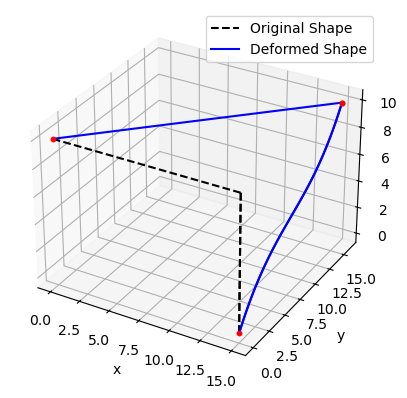

Critical buckling load:
 13.67660332935367
Buckling mode:
 [-1.45717001e-04 -9.67486088e-01 -8.16922485e-06  1.01874869e-01
 -7.00830502e-02 -1.26151636e-01  9.46190694e-02  2.50937705e-02
 -1.52262353e-01]


In [11]:
b = 0.5
h = 1.0
E = 1000
nu = 0.3
A = b*h
Iy = h * b**3 / 12
Iz = b * h**3 / 12
I_polar = b*h/12 * (h**2 + b**2)
J = 0.02861
F3 = Frame()
node0 = Node(coords = np.array([0, 0, 10]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0)
node1 = Node(coords = np.array([15, 0, 10]), F_x = 0.1, F_y = 0.05, F_z = -0.07, M_x = 0.05, M_y = -0.1, M_z = 0.25)
node2 = Node(coords = np.array([15, 0, 0]), u_x = 0, u_y = 0, u_z = 0, M_x = 0, M_y = 0, M_z = 0)
element0 = Element(node_list=[node0, node1], A = A, E = E, Iz = Iz, Iy= Iy, J = J, nu = nu, local_z = np.array([0, 0, 1]))
element1 = Element(node_list=[node1, node2], A = A, E = E, Iy = Iy, Iz = Iz, J = J, nu = nu, local_z = np.array([1, 0, 0]))
F3.add_elements([element0, element1])
F3.assemble()
delta, F_rxn = F3.solve()
print(f"Delta:\n {delta}")
print(f"Reaction force on supports:\n {F_rxn}")
hermite_sf = HermiteShapeFunctions()
plot_deformed([element0, element1], hermite_sf, delta, scale=10)
F3.assemble_geometric()
F3.assemble_geometric()
eigvals, eigvecs = F3.eigenvalue_analysis()
critical_load_idx = np.argsort(abs(eigvals.real))[0]
print(f"Critical buckling load:\n {abs(eigvals.real)[critical_load_idx]}")
print(f"Buckling mode:\n {eigvecs[:, critical_load_idx]}")

## 2.

<div style="text-align:center">
    <img src="figs/ex2.png" width="600"/>
</div>

Delta:
 [ 0.16297422  0.06753731  0.          0.0038603  -0.00977672  0.00997704
  0.05683823 -0.02127261 -0.04423469  0.00395566 -0.00929992  0.00997704
  0.00104443  0.00109052  0.00034632  0.00313556 -0.0040055   0.00514273
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00455166  0.00049019  0.00066426]
Reaction force on supports:
 [ 0.          0.          0.0066722   0.          0.          0.
  0.1        -0.05       -0.075       0.          0.          0.
  0.          0.          0.          0.5        -0.1         0.3
 -0.02351271  0.13794825  0.02532498 -0.41161075  0.29811823 -0.36144034
 -0.07648729 -0.08794825  0.04300282  0.          0.          0.        ]


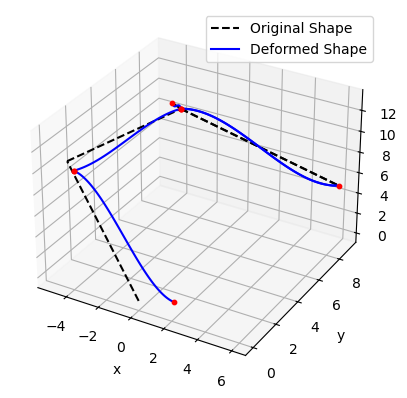

Critical buckling load:
 198.0320633629553
Buckling mode:
 [-0.75240445 -0.45929373 -0.05561773  0.07001583  0.05687484 -0.03738207
 -0.25590227  0.33363122 -0.03836002  0.09143715  0.06270587  0.01845274
 -0.02984496 -0.04424303  0.01993386  0.04585991  0.00984475  0.06336532
 -0.00764146 -0.09944556]


In [18]:
r = 1
E = 500
nu = 0.3
A = np.pi * r**2
Iy = np.pi * r**4 / 4
Iz = np.pi * r**4 / 4
I_polar = np.pi * r**4 / 2
J = np.pi * r**4 / 2
F4 = Frame()
node0 = Node(coords = np.array([0, 0, 0]), F_x = 0, F_y = 0, u_z = 0, M_x = 0, M_y = 0, M_z = 0)
node1 = Node(coords = np.array([-5, 1, 10]), F_x = 0.1, F_y = -0.05, F_z = -0.075, M_x = 0, M_y = 0, M_z = 0)
node2 = Node(coords = np.array([-1, 5, 13]), F_x = 0, F_y = 0, F_z = 0, M_x = 0.5, M_y = -0.1, M_z = 0.3)
node3 = Node(coords = np.array([-3, 7, 11]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0)
node4 = Node(coords = np.array([6, 9, 5]), u_x = 0, u_y = 0, u_z = 0, M_x = 0, M_y = 0, M_z = 0)
element0 = Element(node_list=[node0, node1], A = A, E = E, Iz = Iz, Iy= Iy, J = J, nu = nu)
element1 = Element(node_list=[node1, node2], A = A, E = E, Iy = Iy, Iz = Iz, J = J, nu = nu)
element2 = Element(node_list=[node2, node3], A = A, E = E, Iy = Iy, Iz = Iz, J = J, nu = nu)
element3 = Element(node_list=[node2, node4], A = A, E = E, Iy = Iy, Iz = Iz, J = J, nu = nu)
F4.add_elements([element0, element1, element2, element3])
F4.assemble()
delta, F_rxn = F4.solve()
print(f"Delta:\n {delta}")
print(f"Reaction force on supports:\n {F_rxn}")
hermite_sf = HermiteShapeFunctions()
plot_deformed([element0, element1, element2, element3], hermite_sf, delta, scale=10)
F4.assemble_geometric()
eigvals, eigvecs = F4.eigenvalue_analysis()
critical_load_idx = np.argsort(abs(eigvals.real))[0]
print(f"Critical buckling load:\n {abs(eigvals.real)[critical_load_idx]}")
print(f"Buckling mode:\n {eigvecs[:, critical_load_idx]}")

# 6. Critical Load Analysis

Delta:
 [ 0.          0.          0.          0.          0.          0.
  0.         -0.00220685  0.          0.          0.         -0.00020689
  0.         -0.00772398  0.          0.          0.         -0.00033103
  0.         -0.01489625  0.          0.          0.         -0.00037241]
Reaction force on supports:
 [ 0.  1.  0.  0.  0. 60.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -1.  0.  0.  0.  0.]


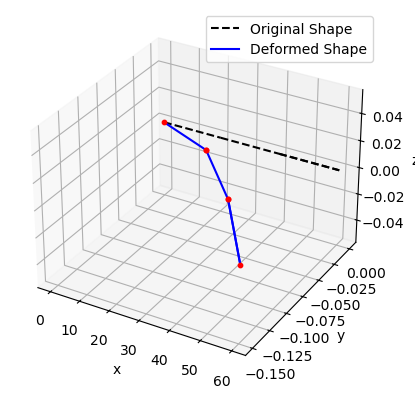

Critical buckling load:
 274.75105525032643
Buckling mode:
 [ 0.          0.         -0.06558137 -0.01385116  0.00918139  0.
  0.          0.         -0.3929939  -0.01829421  0.02266897  0.
  0.          0.         -0.91597238 -0.01861609  0.02789652  0.        ]


In [13]:
b = 0.5
h = 1.0
E = 29000
nu = 0.3
A = 20
Iy = 6.67
Iz = 166.67
I_polar = Iz + Iy
J = 26.67
F5 = Frame()
node0 = Node(coords = np.array([0, 0, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0)
node1 = Node(coords = np.array([20, 0, 0]), F_x = 0, F_y = 0, F_z = 0, M_x = 0, M_y = 0,  M_z = 0)
node2 = Node(coords = np.array([40, 0, 0]), F_x = 0, F_y = 0, F_z = 0, M_x = 0, M_y = 0,  M_z = 0)
node3 = Node(coords = np.array([60, 0, 0]), F_x = 0, F_y = -1, F_z = 0, M_x = 0, M_y = 0,  M_z = 0)
element0 = Element(node_list=[node0, node1], A = A, E = E, Iz = Iz, Iy= Iy, J = J, nu = nu, I_rho = I_polar)
element1 = Element(node_list=[node1, node2], A = A, E = E, Iz = Iz, Iy= Iy, J = J, nu = nu, I_rho = I_polar)
element2 = Element(node_list=[node2, node3], A = A, E = E, Iz = Iz, Iy= Iy, J = J, nu = nu, I_rho = I_polar)
F5.add_elements([element0, element1, element2])
F5.assemble()
delta, F_rxn = F5.solve()
print(f"Delta:\n {delta}")
print(f"Reaction force on supports:\n {F_rxn}")
hermite_sf = HermiteShapeFunctions()
plot_deformed([element0, element1, element2], hermite_sf, delta, scale=10)
F5.assemble_geometric()
eigvals, eigvecs = F5.eigenvalue_analysis()
critical_load_idx = np.argsort(abs(eigvals.real))[0]
print(f"Critical buckling load:\n {abs(eigvals.real)[critical_load_idx]}")
print(f"Buckling mode:\n {eigvecs[:, critical_load_idx]}")

Delta:
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.54929659e-03 -1.27323954e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.31225238e-16]
Reaction force on supports:
 [ 6.0000000e-01  8.0000000e-01  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -3.7345083e-15 -6.0000000e-01 -8.0000000e-01
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]


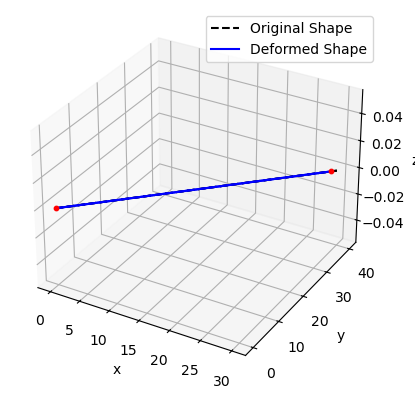

Critical buckling load:
 0.7809879011060528
Buckling mode:
 [-0.          0.         -0.99950879 -0.02507191  0.01880393  0.        ]


In [22]:
L = 50
E = 1000
nu = 0.3
r = 1
A = np.pi*r**2
I_y = np.pi*r**4 / 4
I_z = np.pi*r**4 / 4
I_rho = np.pi*r**4 / 2
J = np.pi*r**4 / 2
P_analytical = np.pi **2 * E * I_z / (2 * L) **2
F6 = Frame()
node0 = Node(coords = np.array([0, 0, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0)
node1 = Node(coords = np.array([30, 40, 0]), F_x = -3/5, F_y = -4/5, F_z = 0, M_x = 0, M_y = 0,  M_z = 0)
element0 = Element(node_list=[node0, node1], A = A, E = E, Iz = I_z, Iy= I_y, J = J, nu = nu, I_rho = I_rho)
F6.add_elements([element0])
F6.assemble()
delta, F_rxn = F6.solve()
print(f"Delta:\n {delta}")
print(f"Reaction force on supports:\n {F_rxn}")
hermite_sf = HermiteShapeFunctions()
plot_deformed([element0], hermite_sf, delta, scale=100)
F6.assemble_geometric()
eigvals, eigvecs = F6.eigenvalue_analysis()
critical_load_idx = np.argsort(abs(eigvals.real))[0]
print(f"Critical buckling load:\n {abs(eigvals.real)[critical_load_idx]}")
print(f"Buckling mode:\n {eigvecs[:, critical_load_idx]}")
# import matplotlib.pyplot as plt
# plt.plot(eigvecs[:, critical_load_idx])
# plt.show()

Delta:
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.51028104e-17  1.38777878e-17
 -6.36619772e-02 -4.33680869e-19  6.50521303e-19 -1.51788304e-18
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.20417043e-17 -6.93889390e-18
 -6.36619772e-02 -8.67361738e-19  2.05998413e-18 -1.95156391e-18
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.93889390e-17 -1.38777878e-17
 -6.36619772e-02 -4.33680869e-19  2.27682456e-18 -2.16840434e-18
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.28583860e-17  2.08166817e-17
 -6.36619772e-02 -4.33680869e-19  1.19262239e-18 -2.16840434e-18]


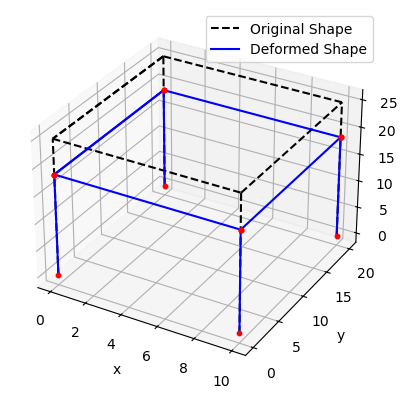

[4.57787590e+03+0.j 2.60820620e+03+0.j 1.74561069e+03+0.j
 1.74448589e+03+0.j 3.60135360e+03+0.j 1.62365966e+03+0.j
 4.07597959e+02+0.j 4.09448979e+02+0.j 8.71863968e+02+0.j
 8.72896988e+02+0.j 3.94550945e+02+0.j 3.92699082e+02+0.j
 4.67520995e-01+0.j 3.42962208e-01+0.j 6.52613975e+00+0.j
 5.82590957e+00+0.j 5.55812162e+00+0.j 4.35437206e+00+0.j
 2.65071548e+00+0.j 3.21708336e+00+0.j 3.07214524e-01+0.j
 1.91439308e+00+0.j 3.39925052e+00+0.j 3.04715734e+00+0.j]
Critical buckling load:
 0.3072145243026685
Buckling mode:
 [ 5.44069728e-13 -4.99899553e-01 -4.67436396e-04  1.00109189e-02
  6.69905253e-15 -9.11270885e-15  5.44070765e-13 -4.99899553e-01
 -4.67436396e-04  1.00109189e-02  6.62995233e-15 -9.02029251e-15
  7.00622231e-13 -4.99899553e-01  4.67436396e-04  1.00109189e-02
  8.19027704e-15 -9.05397440e-15  7.00675075e-13 -4.99899553e-01
  4.67436396e-04  1.00109189e-02  8.55704320e-15 -9.11982532e-15]


In [30]:
E = 500
nu = 0.3
r = 0.5
A = np.pi*r**2
I_y = np.pi*r**4 / 4
I_z = np.pi*r**4 / 4
I_rho = np.pi*r**4 / 2
J = np.pi*r**4 / 2
local_z = None
F7 = Frame()
node0 = Node(coords = np.array([0, 0, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0)
node1 = Node(coords = np.array([10, 0, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0)
node2 = Node(coords = np.array([10, 20, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0)
node3 = Node(coords = np.array([0, 20, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0)
node4 = Node(coords = np.array([0, 0, 25]), F_x = 0, F_y = 0, F_z = -1, M_x = 0, M_y = 0, M_z = 0)
node5 = Node(coords = np.array([10, 0, 25]), F_x = 0, F_y = 0, F_z = -1, M_x = 0, M_y = 0, M_z = 0)
node6 = Node(coords = np.array([10, 20, 25]), F_x = 0, F_y = 0, F_z = -1, M_x = 0, M_y = 0, M_z = 0)
node7 = Node(coords = np.array([0, 20, 25]), F_x = 0, F_y = 0, F_z = -1, M_x = 0, M_y = 0, M_z = 0)
# node4 = Node(coords = np.array([0, 0, 25]), F_x = 0, F_y = 0, F_z = -1, theta_x = 0, theta_y = 0, theta_z = 0)
# node5 = Node(coords = np.array([10, 0, 25]), F_x = 0, F_y = 0, F_z = -1, theta_x = 0, theta_y = 0, theta_z = 0)
# node6 = Node(coords = np.array([10, 20, 25]), F_x = 0, F_y = 0, F_z = -1, theta_x = 0, theta_y = 0, theta_z = 0)
# node7 = Node(coords = np.array([0, 20, 25]), F_x = 0, F_y = 0, F_z = -1, theta_x = 0, theta_y = 0, theta_z = 0)
element0 = Element(node_list=[node0, node4], A = A, E = E, Iz = I_z, Iy= I_y, J = J, nu = nu, I_rho = I_rho)
element1 = Element(node_list=[node1, node5], A = A, E = E, Iz = I_z, Iy= I_y, J = J, nu = nu, I_rho = I_rho)
element2 = Element(node_list=[node2, node6], A = A, E = E, Iz = I_z, Iy= I_y, J = J, nu = nu, I_rho = I_rho)
element3 = Element(node_list=[node3, node7], A = A, E = E, Iz = I_z, Iy= I_y, J = J, nu = nu, I_rho = I_rho)
element4 = Element(node_list=[node4, node5], A = A, E = E, Iz = I_z, Iy= I_y, J = J, nu = nu, I_rho = I_rho)
element5 = Element(node_list=[node5, node6], A = A, E = E, Iz = I_z, Iy= I_y, J = J, nu = nu, I_rho = I_rho)
element6 = Element(node_list=[node6, node7], A = A, E = E, Iz = I_z, Iy= I_y, J = J, nu = nu, I_rho = I_rho)
element7 = Element(node_list=[node7, node4], A = A, E = E, Iz = I_z, Iy= I_y, J = J, nu = nu, I_rho = I_rho)
F7.add_elements([element0, element1, element2, element3, element4, element5, element6, element7])
F7.assemble()
delta, F_rxn = F7.solve()
print(f"Delta:\n {delta}")
# print(f"Reaction force on supports:\n {F_rxn}")
hermite_sf = HermiteShapeFunctions()
plot_deformed([element0, element1, element2, element3, element4, element5, element6, element7], hermite_sf, delta, scale=100)
F7.assemble_geometric()
eigvals, eigvecs = F7.eigenvalue_analysis()
print(eigvals)
critical_load_idx = np.argsort(abs(eigvals.real))[0]
print(f"Critical buckling load:\n {abs(eigvals.real)[critical_load_idx]}")
print(f"Buckling mode:\n {eigvecs[:, critical_load_idx]}")

In [10]:
delta

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.51028104e-17,  1.38777878e-17,
       -6.36619772e-02, -4.33680869e-19,  6.50521303e-19, -1.51788304e-18,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.20417043e-17, -6.93889390e-18,
       -6.36619772e-02, -8.67361738e-19,  2.05998413e-18, -1.95156391e-18,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.93889390e-17, -1.38777878e-17,
       -6.36619772e-02, -4.33680869e-19,  2.27682456e-18, -2.16840434e-18,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.28583860e-17,  2.08166817e-17,
       -6.36619772e-02, -4.33680869e-19,  1.19262239e-18, -2.16840434e-18])

In [16]:
F7.K

array([[ 0.01884956,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.01884956,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 15.70796327, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 10.72370569,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        14.68845604,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 15.48140611]], shape=(48, 48))